#Data Loading and Preprocessing

In [1]:
import os
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pprocess = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [3]:
class ISICDataCreate(Dataset):
    def __init__(self, img_path, mask_path, transform=None):
        self.img_path = img_path
        self.mask_path = mask_path
        self.images = sorted(os.listdir(img_path))
        self.masks = sorted(os.listdir(mask_path))
        self.tfm = transform
    def __len__(self):
        return len(self.images)
    def __getitem__(self, idx):
        img_name = os.path.join(self.img_path, self.images[idx])
        mask_name = os.path.join(self.mask_path, self.masks[idx])
        image = Image.open(img_name).convert("RGB")
        mask = Image.open(mask_name).convert("L")  # Convert to grayscale
        if self.tfm:
            image = self.tfm(image)
            mask = self.tfm(mask)
        return image, mask

In [4]:
# import zipfile
# with zipfile.ZipFile('/content/drive/MyDrive/ ISIC.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/')

In [5]:
train_img_path = '/content/drive/MyDrive/DL/ISIC/train'
train_mask_path = '/content/drive/MyDrive/DL/ISIC/train_masks'
test_img_path = '/content/drive/MyDrive/DL/ISIC/test'
test_mask_path = '/content/drive/MyDrive/DL/ISIC/test_masks'
train_dataset = ISICDataCreate(train_img_path, train_mask_path,transform = pprocess)
test_dataset = ISICDataCreate(test_img_path, test_mask_path,transform = pprocess)

In [6]:
train_points, val_points = train_test_split(range(len(train_dataset)), test_size=0.2, random_state=42)
train_sampler = torch.utils.data.SubsetRandomSampler(train_points)
val_sampler = torch.utils.data.SubsetRandomSampler(val_points)
train_loader = DataLoader(train_dataset, batch_size=32, sampler=train_sampler,num_workers=8)
val_loader = DataLoader(train_dataset, batch_size=32, sampler=val_sampler,num_workers=8)
test_loader = DataLoader(test_dataset, batch_size=32,num_workers=8)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Analysis and Exploration

In [ ]:
print("The shape of the image is: ", train_dataset[0][0].shape)
print("The shape of the segmentation mask is: ",train_dataset[0][1].shape)


The shape of the image is:  torch.Size([3, 128, 128])
The shape of the segmentation mask is:  torch.Size([1, 128, 128])


In [ ]:
# Print example image and mask filenames
print("Checking whether the image and its mask are collated or not")
print("Example Image:", train_dataset.images[1])
print("Example Mask:", train_dataset.masks[1])


Checking whether the image and its mask are collated or not
Example Image: ISIC_0000001.jpg
Example Mask: ISIC_0000001.png


In [ ]:
print("Sample data value: 1st image")
print(train_dataset[0][0])

Sample data value: 1st image
tensor([[[0.6471, 0.6235, 0.6275,  ..., 0.6510, 0.6353, 0.6588],
         [0.5961, 0.5725, 0.5843,  ..., 0.6078, 0.6000, 0.6235],
         [0.6039, 0.5804, 0.5882,  ..., 0.6157, 0.6078, 0.6275],
         ...,
         [0.6706, 0.6431, 0.6471,  ..., 0.7059, 0.7098, 0.7255],
         [0.6667, 0.6314, 0.6471,  ..., 0.7059, 0.7020, 0.7255],
         [0.6980, 0.6706, 0.6863,  ..., 0.7451, 0.7490, 0.7569]],

        [[0.7490, 0.7451, 0.7725,  ..., 0.8196, 0.8078, 0.8157],
         [0.7333, 0.7294, 0.7490,  ..., 0.8039, 0.7922, 0.7961],
         [0.7451, 0.7412, 0.7529,  ..., 0.8157, 0.8039, 0.8039],
         ...,
         [0.8157, 0.8078, 0.8196,  ..., 0.8902, 0.8902, 0.8980],
         [0.8078, 0.8039, 0.8118,  ..., 0.8863, 0.8902, 0.8941],
         [0.8157, 0.8157, 0.8275,  ..., 0.8980, 0.8980, 0.8980]],

        [[0.8706, 0.8824, 0.9098,  ..., 0.9647, 0.9725, 0.9608],
         [0.8784, 0.8980, 0.9216,  ..., 0.9922, 0.9882, 0.9647],
         [0.8941, 0.9137, 0.9

In [ ]:
print("Sample data value: Segmentation mask of 1st image")
print(train_dataset[0][1])

Sample data value: Segmentation mask of 1st image
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [ ]:
means = []
devs = []
for image, _ in train_dataset:
    means.append(image.mean())
    devs.append(image.std())
print(f'Mean pixel value: {np.mean(means):.4f}')
print(f'Standard deviation of pixel values: {np.mean(devs):.4f}')

Mean pixel value: 0.6366
Standard deviation of pixel values: 0.1514


Visualization of randomly sampled 5 images and their mask


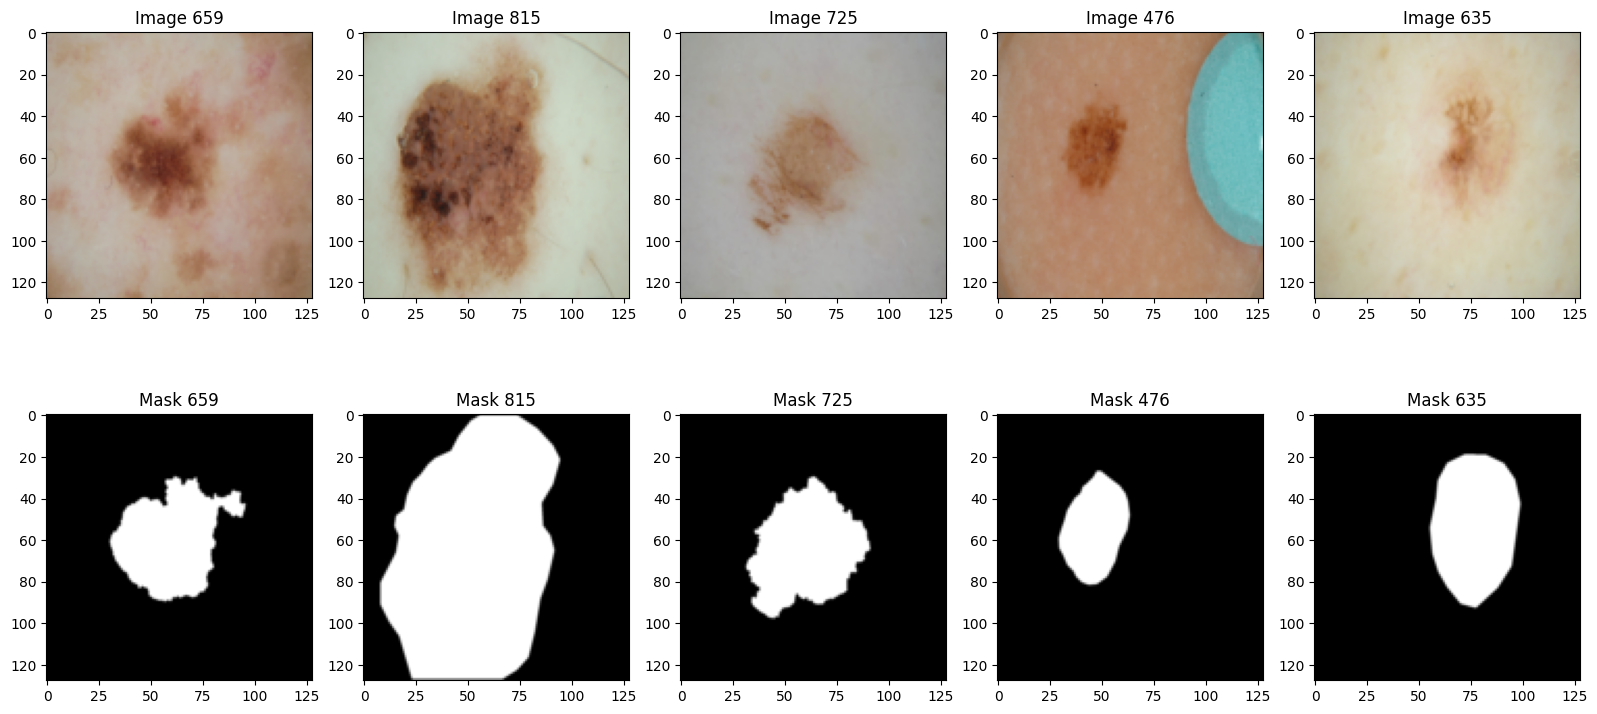

In [ ]:
print("Visualization of randomly sampled 5 images and their mask")
import matplotlib.pyplot as plt
import random
n = 5
index = random.sample(range(len(train_dataset)), n)
fig, axes = plt.subplots(2, n, figsize=(16, 8))
for i, j in enumerate(index):
    image, mask = train_dataset[j]
    img = image.permute(1, 2, 0).numpy()
    masks = mask.squeeze().numpy()
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Image {j}')
    axes[1, i].imshow(masks, cmap='gray')
    axes[1, i].set_title(f'Mask {j}')
plt.tight_layout()
plt.show()


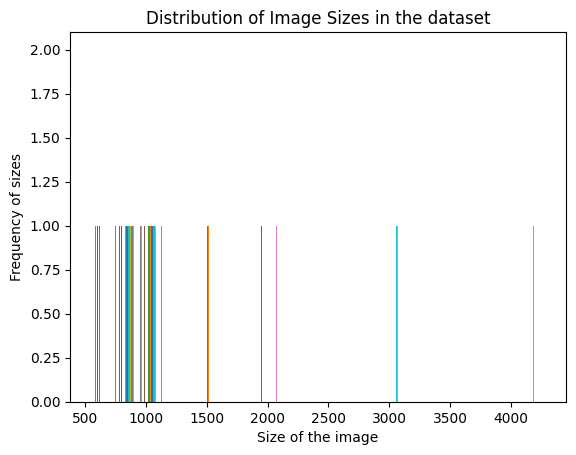

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
def size_dist(dataset):
    sizes = []
    for img in dataset.images:
        im_dir = os.path.join(dataset.img_path, img)
        with Image.open(im_dir) as img:
            w, h = img.size
            sizes.append((w, h))
    plt.hist(sizes, bins=20)
    plt.xlabel('Size of the image')
    plt.ylabel('Frequency of sizes')
    plt.title('Distribution of Image Sizes in the dataset')
    plt.show()
size_dist(train_dataset)

**Creating sample dataset, applying and visualising some augmentations on it **

In [ ]:
sample_dataset = ISICDataCreate(test_img_path, test_mask_path,transform = pprocess)

In [ ]:
import torch
import torchvision.transforms as transforms
torch.manual_seed(42)
def apply_aug(image, mask):
    augs = transforms.Compose([
        transforms.ToPILImage(),transforms.RandomApply([transforms.RandomHorizontalFlip(),transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)
        ], p=0.5),transforms.ToTensor()])
    aug_image = augs(image)
    aug_mask = augs(mask)
    return aug_image, aug_mask
sample_img = []
sample_mask = []
for i in range(len(sample_dataset)):
    image, mask = sample_dataset[i]
    new_image, new_mask = apply_aug(image, mask)
    sample_img.append(new_image)
    sample_mask.append(new_mask)

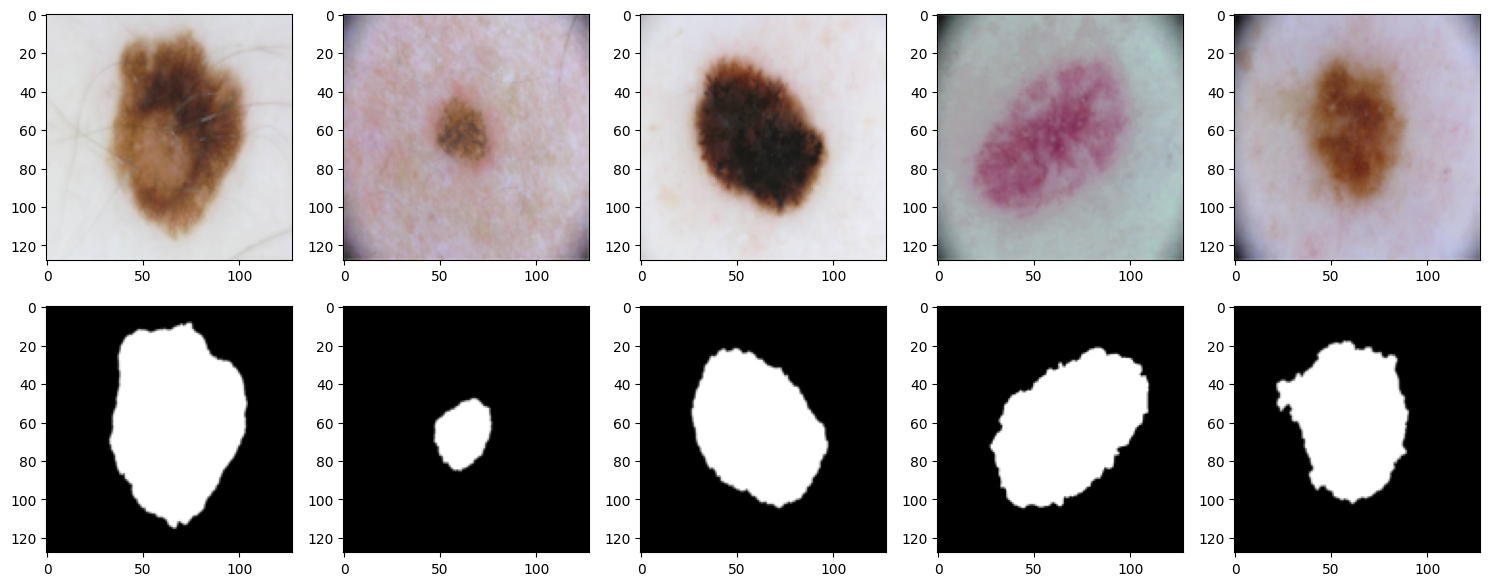

In [ ]:
import matplotlib.pyplot as plt
# Visualising the augmented images and masks
n = 5
plt.figure(figsize=(15, 6))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(sample_img[i].permute(1, 2, 0))
    plt.subplot(2, n, i + n + 1)
    plt.imshow(sample_mask[i].squeeze(), cmap='gray')
plt.tight_layout()
plt.show()


# Architecture 1: Freeze encoder and design a decoder on its top

In [7]:
import torch.nn as nn
import torchvision.models as models
class BaseLayers(nn.Module):
    def __init__(self):
        super(BaseLayers, self).__init__()
        self.base = models.mobilenet_v2(pretrained=True).features
    def forward(self, x):
        return self.base(x)
class TopLayers(nn.Module):
    def __init__(self):
        super(TopLayers, self).__init__()
        self.layer1 = nn.ConvTranspose2d(1280, 512, kernel_size=4, stride=2, padding=1)
        self.layer2 = nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1)
        self.layer3 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1)
        self.layer4 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.layer5 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        self.layer6 = nn.Conv2d(32, 1, kernel_size=1)
        self.regularise = nn.Dropout(p=0.5)
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.regularise(x)
        x = self.layer6(x)
        return x

In [8]:
def freeze(model):
    for par in model.parameters():
        par.requires_grad = False
def unfreeze(model):
    for par in model.parameters():
        par.requires_grad = True

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
seg_encoder = BaseLayers()
freeze(seg_encoder)
seg_decoder = TopLayers()
seg_encoder = seg_encoder.to(device)
seg_decoder = seg_decoder.to(device)
lossfn = nn.BCEWithLogitsLoss()
opts = torch.optim.AdamW(seg_decoder.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 131MB/s]


In [61]:
print(seg_encoder)

BaseLayers(
  (base): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05

In [62]:
print(seg_decoder)

TopLayers(
  (layer1): ConvTranspose2d(1280, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer5): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer6): Conv2d(32, 1, kernel_size=(1, 1), stride=(1, 1))
  (regularise): Dropout(p=0.5, inplace=False)
)


In [11]:
def training_mode(base,top, lossfunc, opt, loader, device):
    top.train()
    train_loss = 0.0
    for ins, outs in loader:
        ins = ins.to(device)
        outs = outs.to(device)
        opt.zero_grad()
        extraction = base(ins)
        mask =top(extraction)
        loss = lossfunc(mask, outs)
        loss.backward()
        opt.step()
        train_loss += loss.item()
        avg_loss = train_loss / len(loader)
    return avg_loss

In [12]:
def validation_mode(base,top, lossfunc, loader, device):
    top.eval()
    val_loss = 0.0
    with torch.no_grad():
        for ins, outs in loader:
          ins = ins.to(device)
          outs = outs.to(device)
          extraction = base(ins)
          mask =top(extraction)
          loss = lossfunc(mask, outs)
          val_loss += loss.item()
          avg_loss = val_loss / len(loader)
    return avg_loss

In [13]:
import torch
def get_acc(preds,labs):
    binary_predictions = (preds > 0.5).int()
    flat_preds = binary_predictions.view(-1)
    flat_labs = labs.view(-1)
    true_pixels = torch.sum(flat_preds == flat_labs)
    pixels = flat_preds.numel()
    accuracy = true_pixels.item()/pixels
    return accuracy

In [14]:
def testing_mode(base,top,loader,lossfunc, device, threshold):
    top.eval()
    test_loss,iou,dice,accuracy = 0.0,0.0,0.0,0.0
    with torch.no_grad():
        for ins, outs in loader:
            ins = ins.to(device)
            outs = outs.to(device)
            extraction = base(ins)
            mask =top(extraction)
            loss = lossfunc(mask, outs)
            test_loss += loss.item()
            generation = (mask > threshold).int()  # predictions
            smooth = 1e-6
            common = (generation * outs).sum()
            union1 = generation.sum() + outs.sum() - common
            union2 = generation.sum() + outs.sum()
            iou = (common+smooth) / (union1+smooth)
            dice = (2.0*common + smooth)/(union2 + smooth)
            accuracy  += get_acc(generation,outs)
    test_loss /= len(loader)
    accuracy /= len(loader)
    return test_loss, iou, dice,accuracy

In [15]:
import matplotlib.pyplot as plt
def loss_plot(train_losses, val_losses,test_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss',color = 'red')
    plt.plot(val_losses, label='Validation Loss',color = 'green')
    plt.plot(test_losses, label='Test Loss',color = 'blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training, Validation and Test Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
def iou_plot(iou_scores):
    iou_scores = [score.item() for score in iou_scores]
    plt.figure(figsize=(10, 5))
    plt.plot(iou_scores,color = 'red')
    plt.xlabel('Epoch')
    plt.ylabel('IoU Score')
    plt.title('IoU Score per Epoch')
    plt.grid(True)
    plt.show()
def dice_plot(dice_scores):
    dice_scores = [score.item() for score in dice_scores]
    plt.figure(figsize=(10, 5))
    plt.plot(dice_scores,color = 'red')
    plt.xlabel('Epoch')
    plt.ylabel('Dice Score')
    plt.title('Dice Score per Epoch')
    plt.grid(True)
    plt.show()
def acc_plot(accuracy):
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy,color = 'red')
    plt.xlabel('Epoch')
    plt.ylabel('Pixel Wise Accuracy')
    plt.title('Pixel Wise Accuracy per Epoch')
    plt.grid(True)
    plt.show()

In [16]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
def get_masks(loader, encoder, decoder, device, sample=1):
    with torch.no_grad():
        for i, (img, masks) in enumerate(loader):
            if i >= sample:
                break
            img, masks = img.to(device), masks.to(device)
            features = encoder(img)
            outputs = decoder(features)
            generated_masks = (torch.sigmoid(outputs) > 0.5).float()
            for idx in range(len(img)):
                masked_img = TF.to_pil_image(img[idx].cpu())
                true_mask = TF.to_pil_image(masks[idx].cpu())
                pred_mask = TF.to_pil_image(generated_masks[idx].cpu())
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 3, 1)
                plt.imshow(masked_img)
                plt.title("Image")
                plt.subplot(1, 3, 2)
                plt.imshow(true_mask, cmap='gray')
                plt.title("Actual Mask of Image")
                plt.subplot(1, 3, 3)
                plt.imshow(pred_mask, cmap='gray')
                plt.title("Mask produced by the model")
                plt.show()

In [17]:
train_losses = []
val_losses = []
test_losses = []
iou_scores = []
dice_scores = []
final_accs = []

In [18]:
epochs = 20
for i in range(epochs):
    train_loss = training_mode(seg_encoder,seg_decoder, lossfn, opts, train_loader, device)
    val_loss = validation_mode(seg_encoder,seg_decoder, lossfn, val_loader, device)
    test_loss,iou_score, dice_score,accuracy = testing_mode(seg_encoder,seg_decoder, test_loader, lossfn, device,0.5)
    print(f"Epoch: {i+1}/{epochs}:-\tTraining Loss: {train_loss:.4f}\tValidation Loss: {val_loss:.4f}\tTest Loss: {test_loss:.4f}\tIoU Score: {iou_score:.4f}\tDice Score: {dice_score:.4f}")
    print("\n")
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    val_losses.append(val_loss)
    iou_scores.append(iou_score)
    dice_scores.append(dice_score)
    final_accs.append(accuracy)

Epoch: 1/20:-	Training Loss: 0.6843	Validation Loss: 0.6004	Test Loss: 0.6164	IoU Score: 0.0726	Dice Score: 0.1354


Epoch: 2/20:-	Training Loss: 0.4922	Validation Loss: 0.3937	Test Loss: 0.4597	IoU Score: 0.3614	Dice Score: 0.5309


Epoch: 3/20:-	Training Loss: 0.3933	Validation Loss: 0.3657	Test Loss: 0.4055	IoU Score: 0.3776	Dice Score: 0.5482


Epoch: 4/20:-	Training Loss: 0.3727	Validation Loss: 0.3731	Test Loss: 0.3893	IoU Score: 0.5222	Dice Score: 0.6861


Epoch: 5/20:-	Training Loss: 0.3293	Validation Loss: 0.3485	Test Loss: 0.3767	IoU Score: 0.5200	Dice Score: 0.6842


Epoch: 6/20:-	Training Loss: 0.3131	Validation Loss: 0.3837	Test Loss: 0.4726	IoU Score: 0.2753	Dice Score: 0.4317


Epoch: 7/20:-	Training Loss: 0.2900	Validation Loss: 0.3200	Test Loss: 0.3644	IoU Score: 0.5048	Dice Score: 0.6709


Epoch: 8/20:-	Training Loss: 0.2746	Validation Loss: 0.3249	Test Loss: 0.3659	IoU Score: 0.4479	Dice Score: 0.6187


Epoch: 9/20:-	Training Loss: 0.2592	Validation Loss: 0.3297	Test

*Reports and Graphs*

In [53]:
import numpy as np
mean_train_loss = np.mean(train_losses)
mean_val_loss = np.mean(val_losses)
mean_test_loss = np.mean(test_losses)
mean_iou_score = np.mean([score.item() for score in iou_scores])
mean_dice_score = np.mean([score.item() for score in dice_scores])
min_iou_score = np.min([score.item() for score in iou_scores])
min_dice_score = np.min([score.item() for score in dice_scores])
max_iou_score = np.max([score.item() for score in iou_scores])
max_dice_score = np.max([score.item() for score in dice_scores])
mean_final_accuracy = np.mean(final_accs)
print(f'Mean Train Loss: {mean_train_loss:.4f}')
print(f'Mean Validation Loss: {mean_val_loss:.4f}')
print(f'Mean Test Loss: {mean_test_loss:.4f}')
print(f'Min IoU Score: {min_iou_score:.4f}')
print(f'Max IoU Score: {max_iou_score:.4f}')
print(f'Mean IoU Score: {mean_iou_score:.4f}')
print(f'Min Dice Score: {min_dice_score:.4f}')
print(f'Max Dice Score: {max_dice_score:.4f}')
print(f'Mean Dice Score: {mean_dice_score:.4f}')
print(f'Mean Final Accuracy: {mean_final_accuracy:.4f}')


Mean Train Loss: 0.3031
Mean Validation Loss: 0.3639
Mean Test Loss: 0.4027
Min IoU Score: 0.0726
Max IoU Score: 0.5585
Mean IoU Score: 0.4578
Min Dice Score: 0.1354
Max Dice Score: 0.7167
Mean Dice Score: 0.6182
Mean Final Accuracy: 0.8150


In [22]:
def plots(train_losses,val_losses,test_losses,iou_scores,dice_scores,final_accs):
  loss_plot(train_losses,val_losses,test_losses)
  iou_plot(iou_scores)
  dice_plot(dice_scores)
  acc_plot(final_accs)

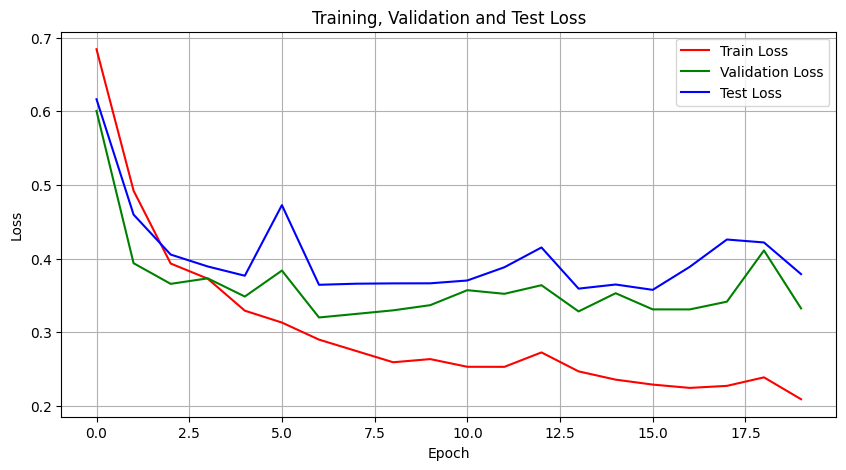

In [23]:
loss_plot(train_losses,val_losses,test_losses)

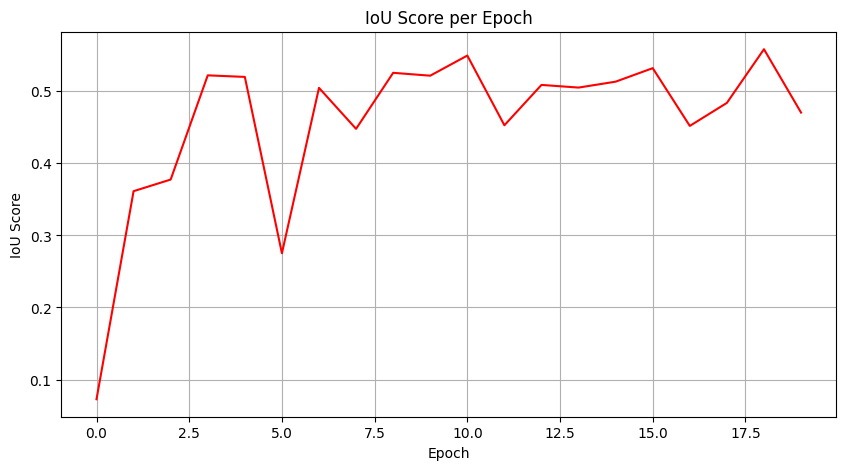

In [24]:
iou_plot(iou_scores)

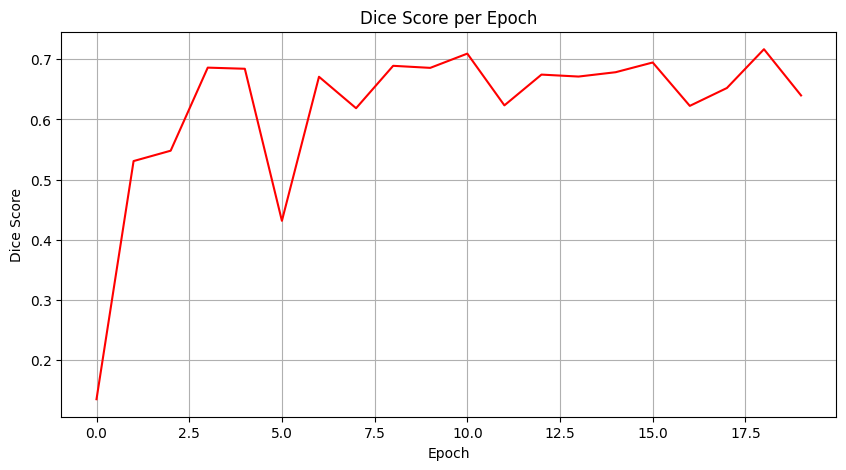

In [25]:
dice_plot(dice_scores)

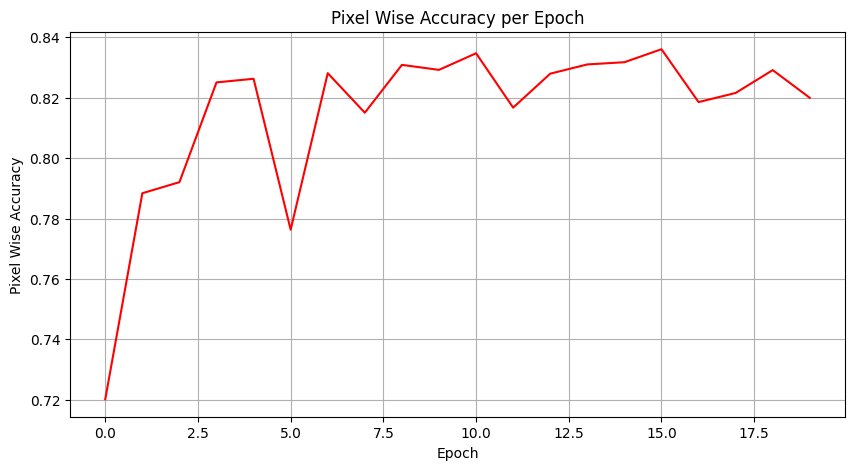

In [26]:
acc_plot(final_accs)

In [27]:
print("Pixel wise Accuracy is: ", accuracy)

Pixel wise Accuracy is:  0.819969571666953


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


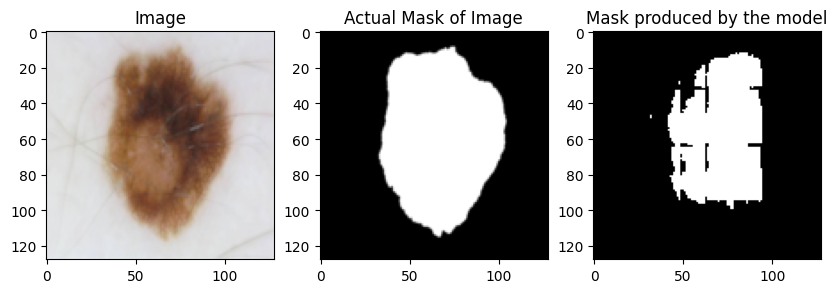

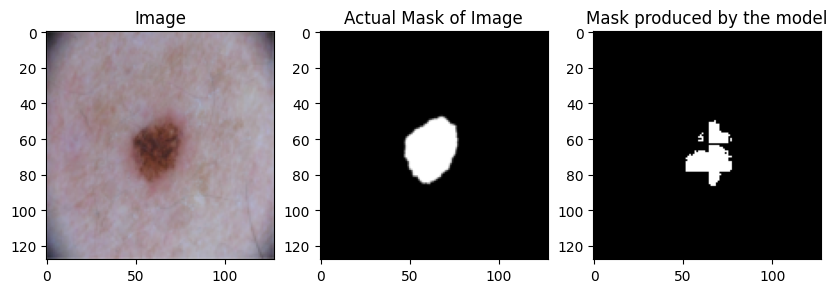

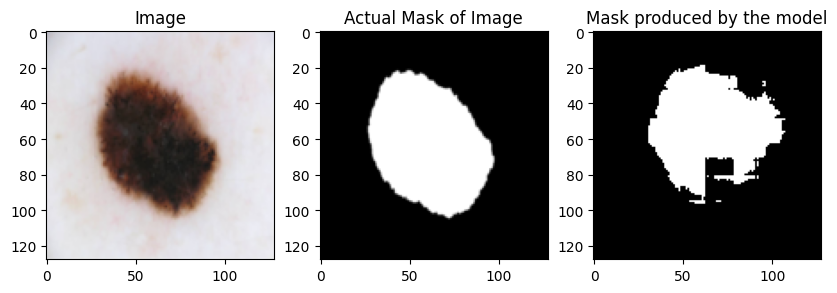

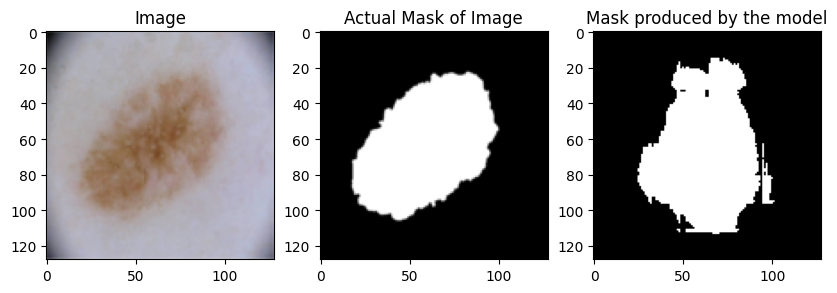

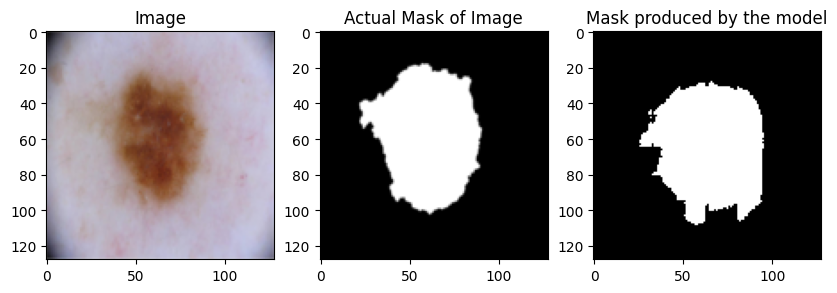

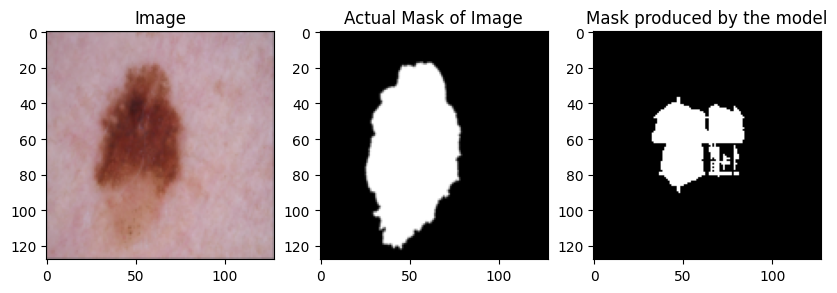

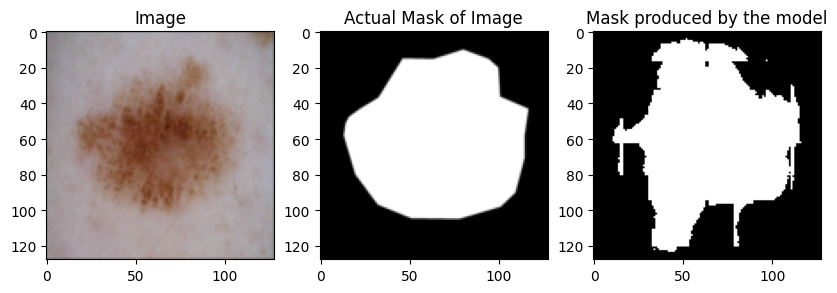

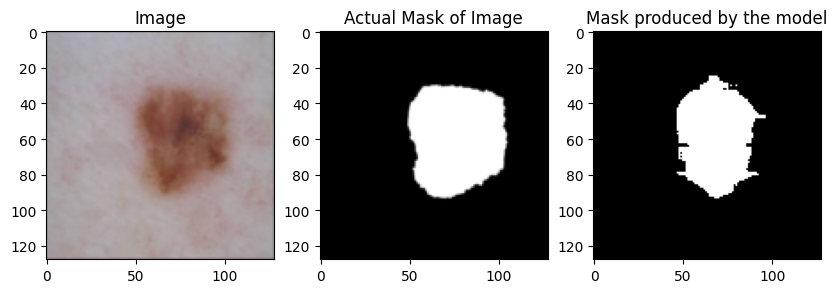

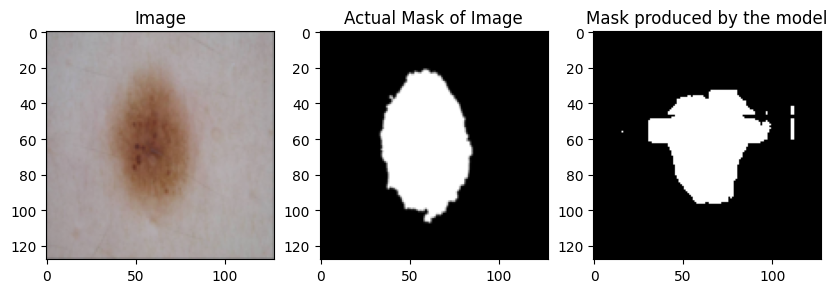

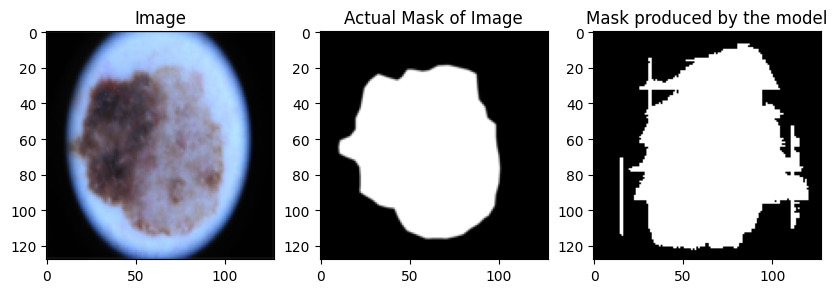

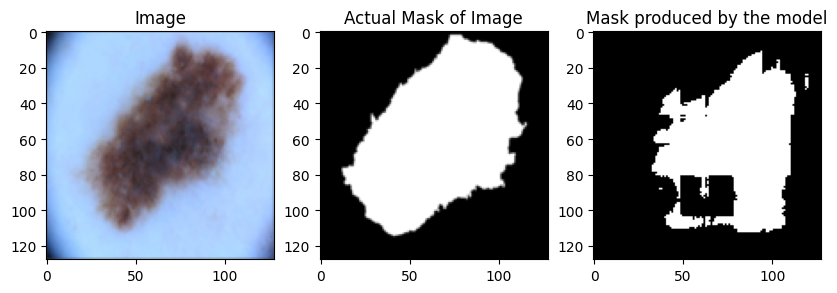

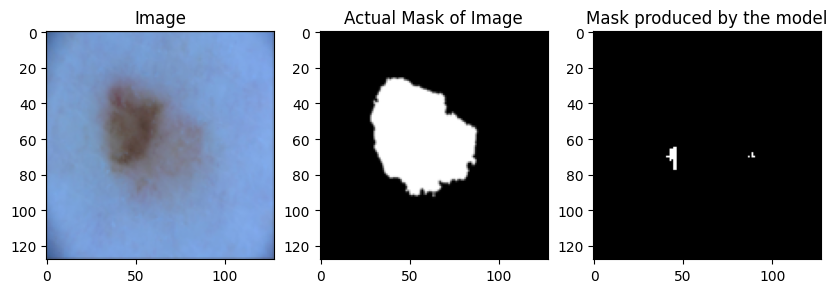

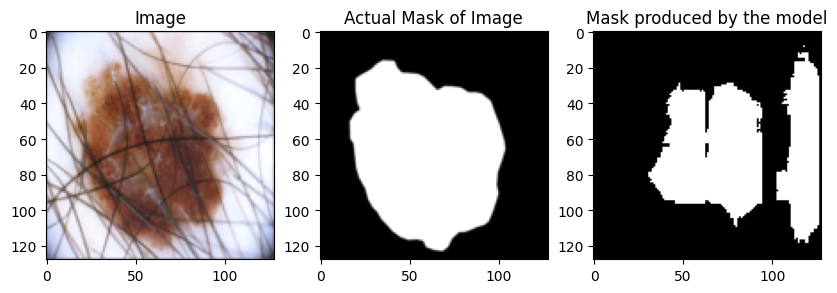

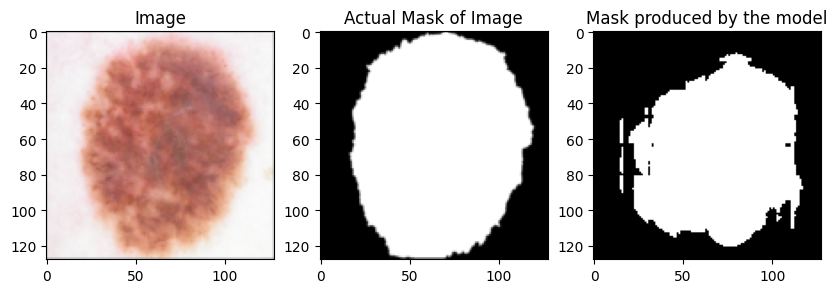

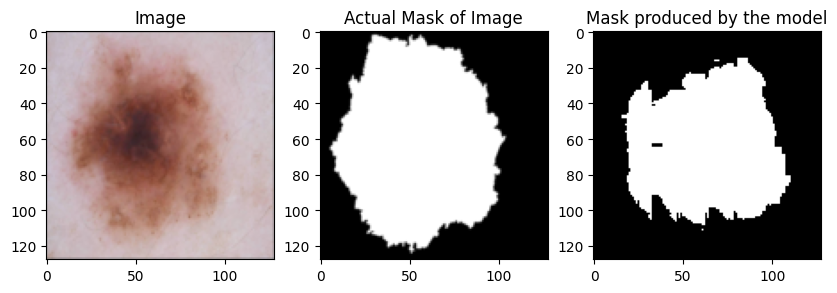

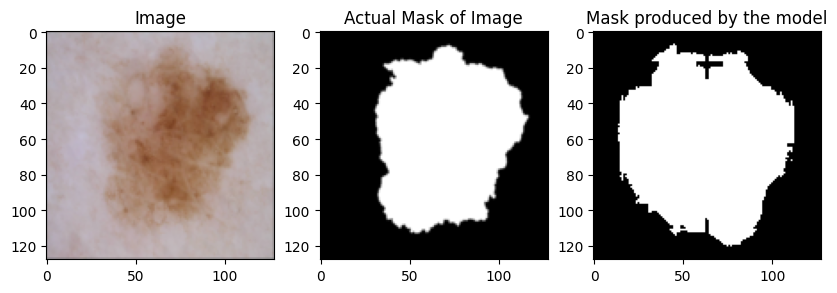

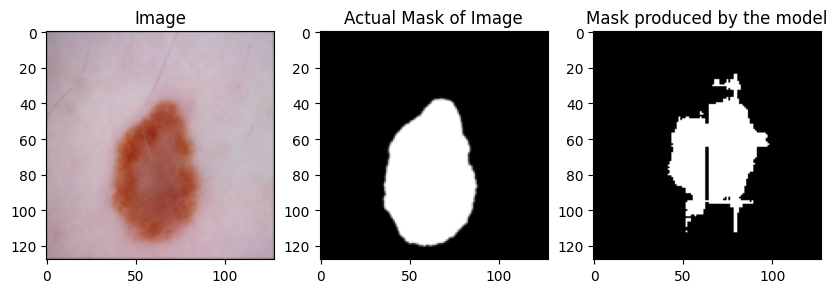

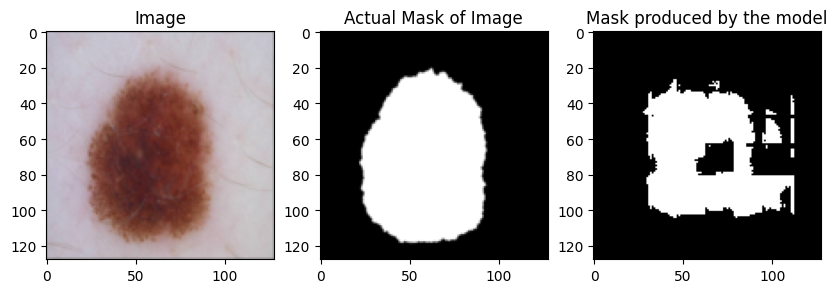

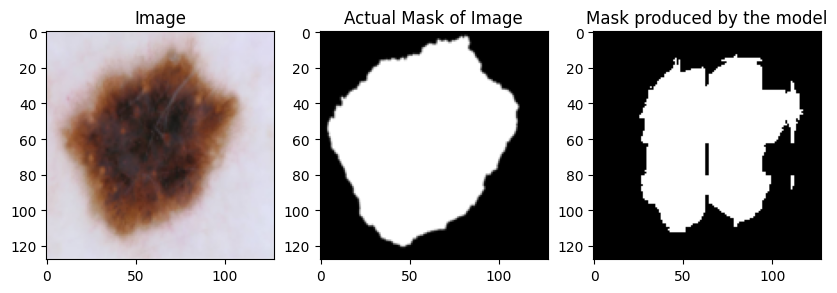

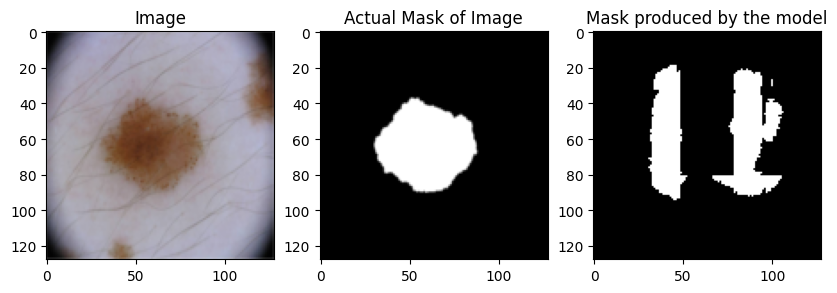

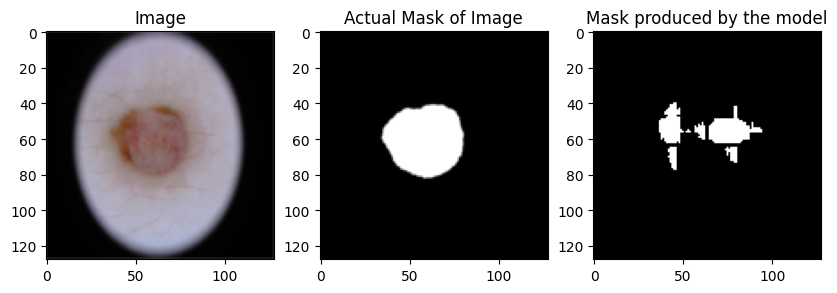

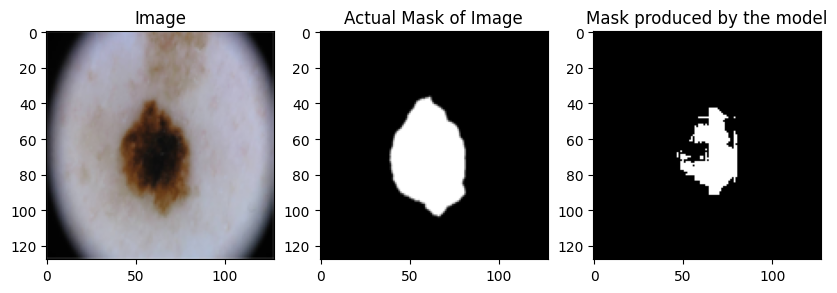

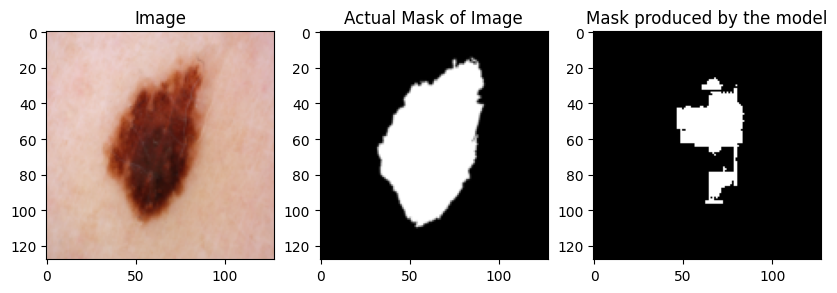

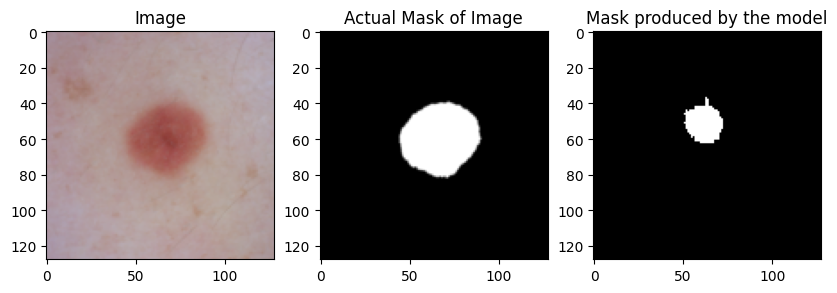

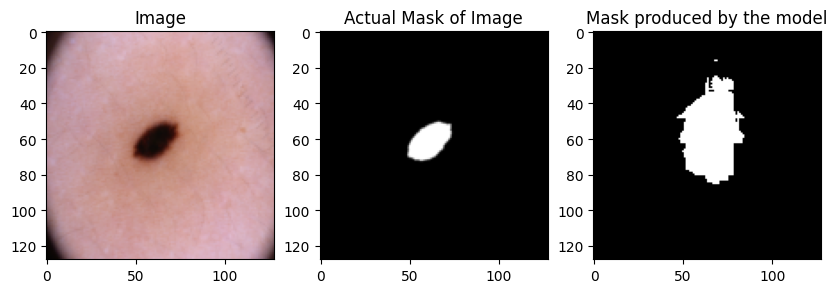

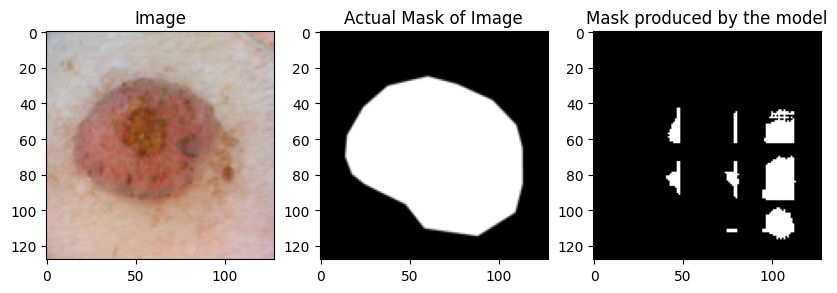

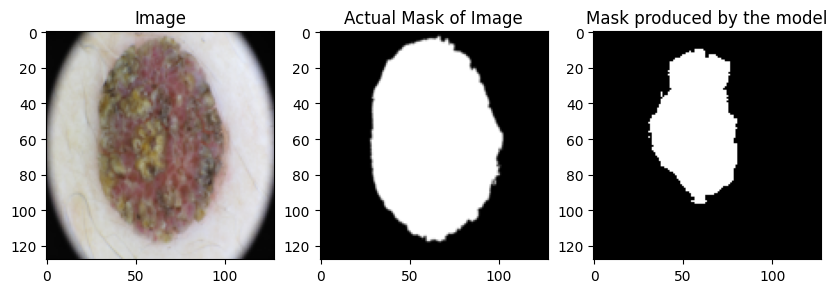

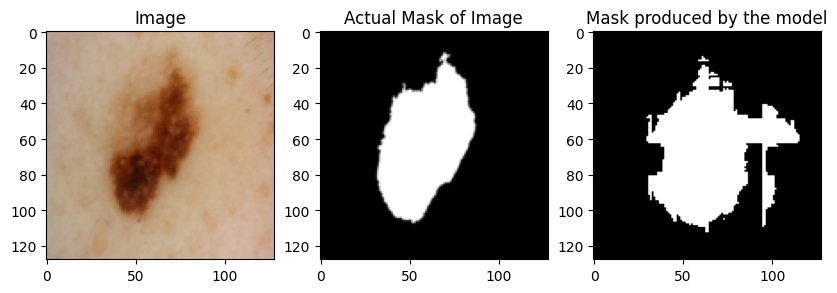

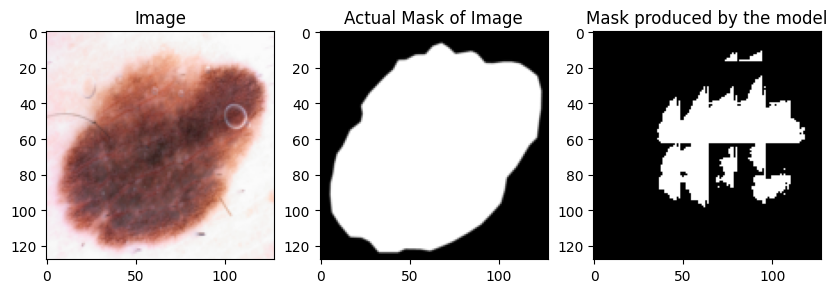

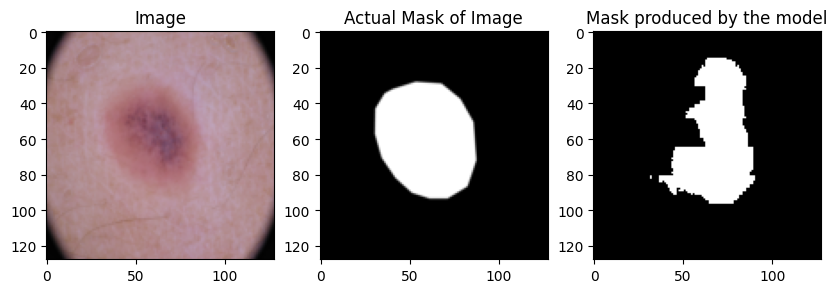

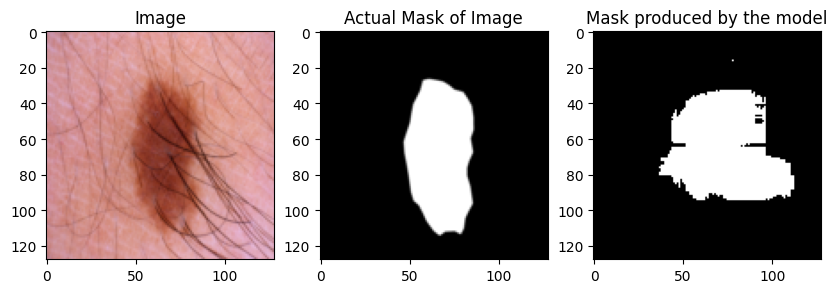

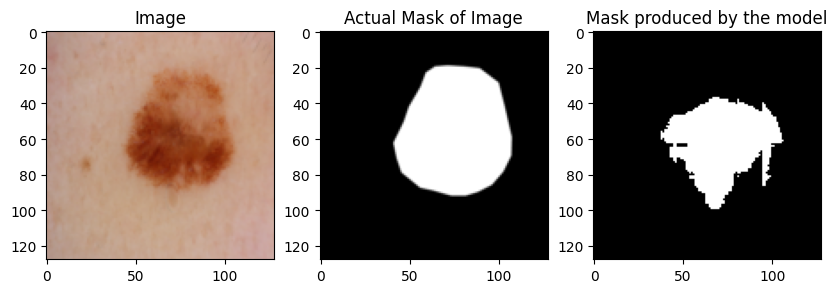

In [28]:
get_masks(test_loader, seg_encoder, seg_decoder, device, sample=1)


In [29]:
import torch
def parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    non_trainable = total - trainable
    return total, trainable, non_trainable

In [30]:
total1, trainable1, non_trainable1 = parameters(seg_encoder)
print(f"Total parameters: {total1}")
print(f"Trainable parameters: {trainable1}")
print(f"Non-trainable parameters: {non_trainable1}")

Total parameters: 2223872
Trainable parameters: 0
Non-trainable parameters: 2223872


In [31]:
total2, trainable2, non_trainable2 = parameters(seg_decoder)
print(f"Total parameters: {total2}")
print(f"Trainable parameters: {trainable2}")
print(f"Non-trainable parameters: {non_trainable2}")

Total parameters: 13272065
Trainable parameters: 13272065
Non-trainable parameters: 0


# Architecture 2: Fine tuning the encoder weights

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seg_encoder2 = BaseLayers()
unfreeze(seg_encoder2)
seg_decoder2 = TopLayers()
seg_encoder2 = seg_encoder2.to(device)
seg_decoder2 = seg_decoder2.to(device)
lossfn2 = nn.BCEWithLogitsLoss()
opts2 = torch.optim.Adam([{'params': seg_decoder2.parameters()},{'params': seg_encoder2.parameters(), 'lr': 0.0001}], lr=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [63]:
print(seg_encoder2)

BaseLayers(
  (base): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05

In [64]:
print(seg_decoder2)

TopLayers(
  (layer1): ConvTranspose2d(1280, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer5): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (layer6): Conv2d(32, 1, kernel_size=(1, 1), stride=(1, 1))
  (regularise): Dropout(p=0.5, inplace=False)
)


In [34]:
train_losses2 = []
val_losses2 = []
test_losses2 = []
iou_scores2 = []
dice_scores2 = []
final_accs2 = []

In [35]:
epochs = 20
for i in range(epochs):
    train_loss2 = training_mode(seg_encoder2,seg_decoder2, lossfn2, opts2, train_loader, device)
    val_loss2 = validation_mode(seg_encoder2,seg_decoder2, lossfn2, val_loader, device)
    test_loss2,iou_score2, dice_score2,accuracy2 = testing_mode(seg_encoder2,seg_decoder2, test_loader, lossfn2, device,0.5)
    print(f"Epoch: {i+1}/{epochs}:-\tTraining Loss: {train_loss2:.4f}\tValidation Loss: {val_loss2:.4f}\tTest Loss: {test_loss2:.4f}\tIoU Score: {iou_score2:.4f}\tDice Score: {dice_score2:.4f}")
    print("\n")
    train_losses2.append(train_loss2)
    test_losses2.append(test_loss2)
    val_losses2.append(val_loss2)
    iou_scores2.append(iou_score2)
    dice_scores2.append(dice_score2)
    final_accs2.append(accuracy2)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 1/20:-	Training Loss: 0.5996	Validation Loss: 0.3378	Test Loss: 0.3388	IoU Score: 0.5764	Dice Score: 0.7313


Epoch: 2/20:-	Training Loss: 0.2936	Validation Loss: 0.2436	Test Loss: 0.2712	IoU Score: 0.6152	Dice Score: 0.7618


Epoch: 3/20:-	Training Loss: 0.2098	Validation Loss: 0.2199	Test Loss: 0.2661	IoU Score: 0.6504	Dice Score: 0.7882


Epoch: 4/20:-	Training Loss: 0.1656	Validation Loss: 0.2254	Test Loss: 0.2280	IoU Score: 0.6900	Dice Score: 0.8165


Epoch: 5/20:-	Training Loss: 0.1501	Validation Loss: 0.1902	Test Loss: 0.2310	IoU Score: 0.6637	Dice Score: 0.7979


Epoch: 6/20:-	Training Loss: 0.1358	Validation Loss: 0.1907	Test Loss: 0.2044	IoU Score: 0.6940	Dice Score: 0.8194


Epoch: 7/20:-	Training Loss: 0.1235	Validation Loss: 0.1797	Test Loss: 0.2030	IoU Score: 0.7053	Dice Score: 0.8272


Epoch: 8/20:-	Training Loss: 0.1207	Validation Loss: 0.2518	Test Loss: 0.2485	IoU Score: 0.6712	Dice Score: 0.8033


Epoch: 9/20:-	Training Loss: 0.1167	Validation Loss: 0.1800	Test

In [54]:
import numpy as np
mean_train_loss2 = np.mean(train_losses2)
mean_val_loss2= np.mean(val_losses2)
mean_test_loss2 = np.mean(test_losses2)
mean_iou_score2 = np.mean([score.item() for score in iou_scores2])
mean_dice_score2 = np.mean([score.item() for score in dice_scores2])
min_iou_score2 = np.min([score.item() for score in iou_scores2])
min_dice_score2 = np.min([score.item() for score in dice_scores2])
max_iou_score2 = np.max([score.item() for score in iou_scores2])
max_dice_score2 = np.max([score.item() for score in dice_scores2])
mean_final_accuracy2 = np.mean(final_accs2)
print(f'Mean Train Loss: {mean_train_loss2:.4f}')
print(f'Mean Validation Loss: {mean_val_loss2:.4f}')
print(f'Mean Test Loss: {mean_test_loss2:.4f}')
print(f'Min IoU Score: {min_iou_score2:.4f}')
print(f'Max IoU Score: {max_iou_score2:.4f}')
print(f'Mean IoU Score: {mean_iou_score2:.4f}')
print(f'Min Dice Score: {min_dice_score2:.4f}')
print(f'Max Dice Score: {max_dice_score2:.4f}')
print(f'Mean Dice Score: {mean_dice_score2:.4f}')
print(f'Mean Final Accuracy: {mean_final_accuracy2:.4f}')


Mean Train Loss: 0.1482
Mean Validation Loss: 0.2054
Mean Test Loss: 0.2370
Min IoU Score: 0.5764
Max IoU Score: 0.7165
Mean IoU Score: 0.6860
Min Dice Score: 0.7313
Max Dice Score: 0.8348
Mean Dice Score: 0.8132
Mean Final Accuracy: 0.8973


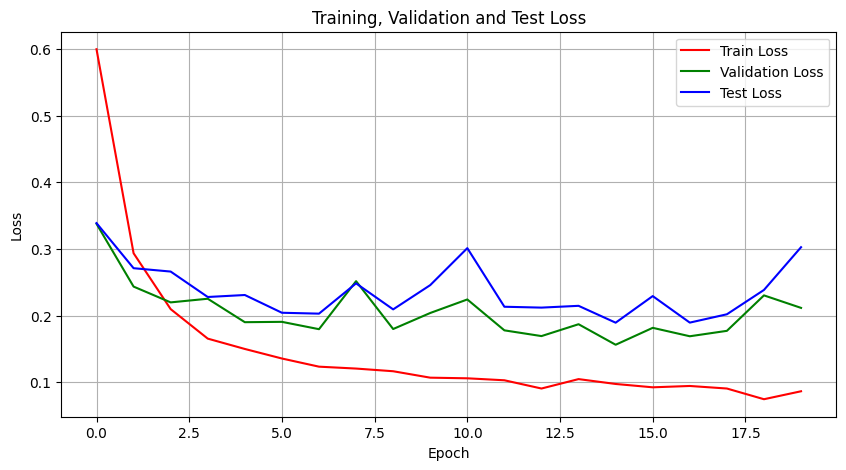

In [37]:
loss_plot(train_losses2,val_losses2,test_losses2)

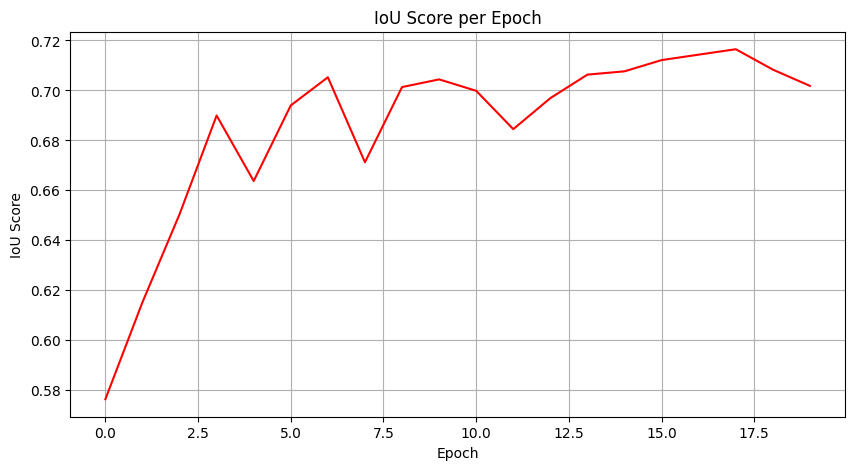

In [38]:
iou_plot(iou_scores2)

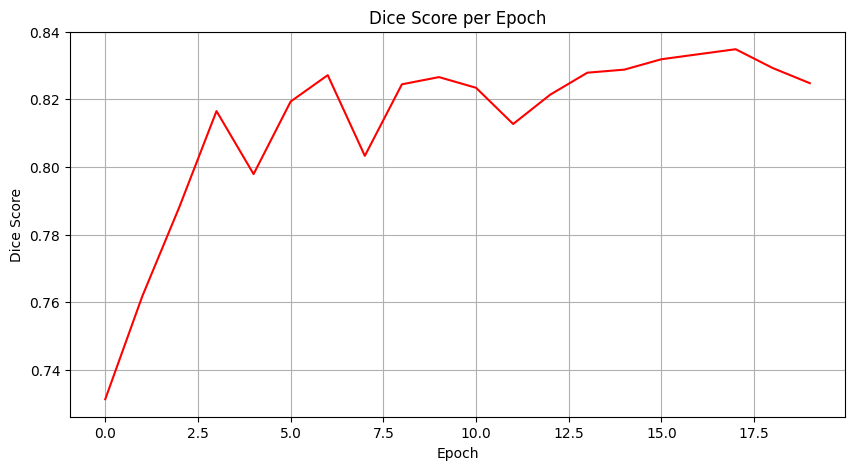

In [39]:
dice_plot(dice_scores2)

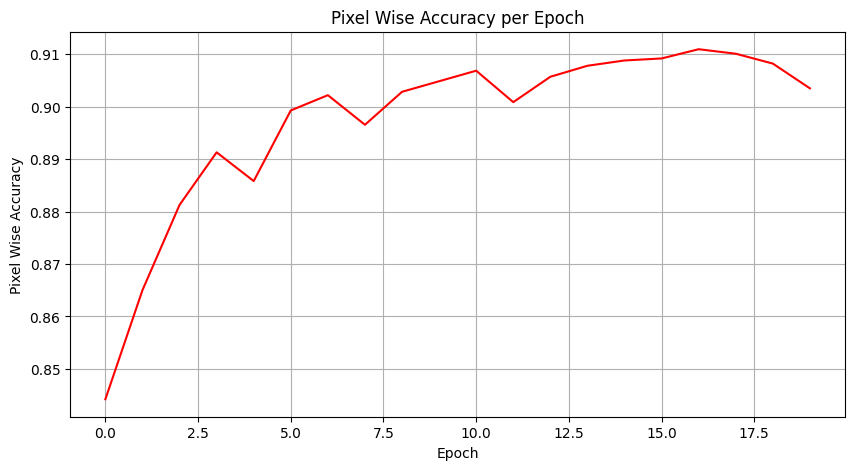

In [40]:
acc_plot(final_accs2)

In [41]:
print("Pixel wise Accuracy:", accuracy2)

Pixel wise Accuracy: 0.9035124307797279


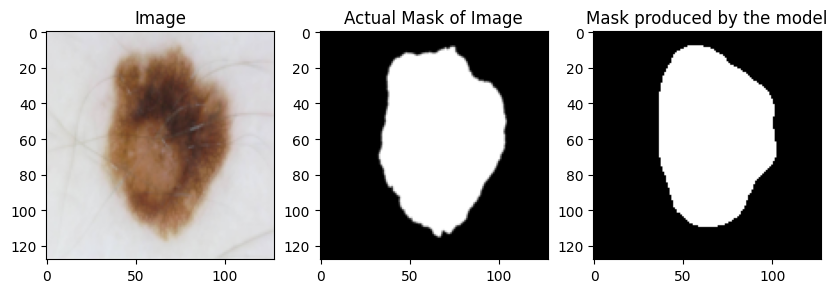

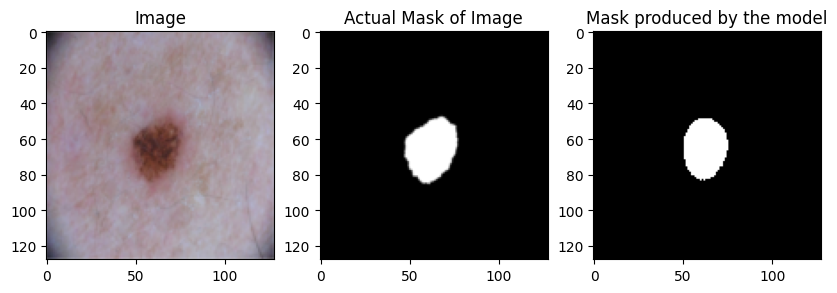

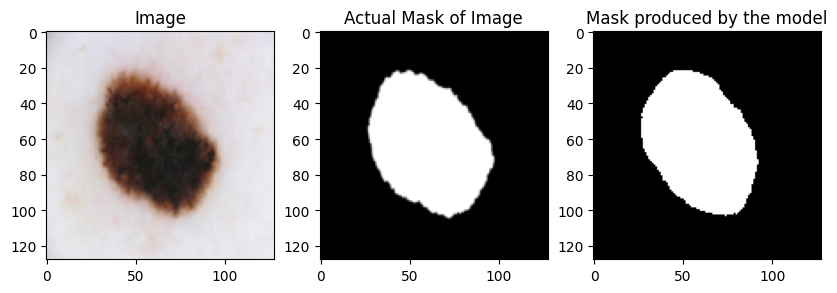

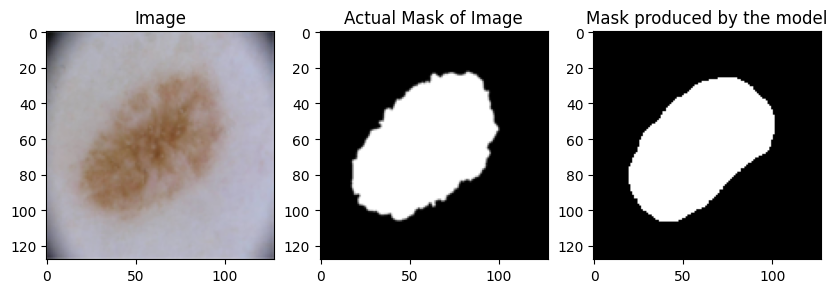

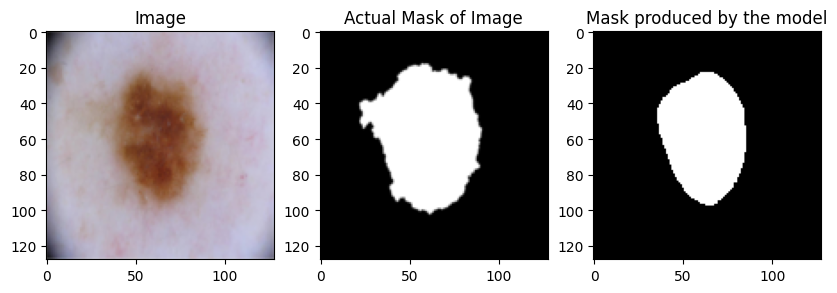

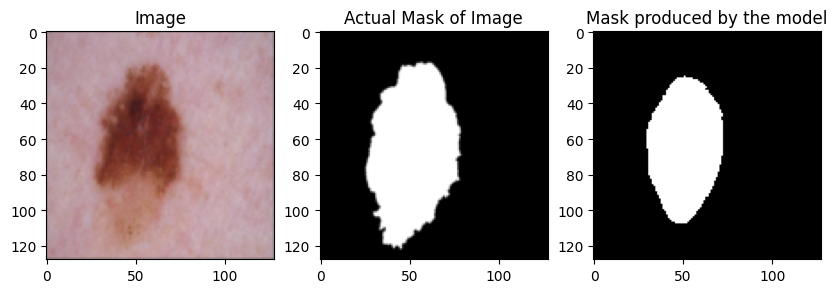

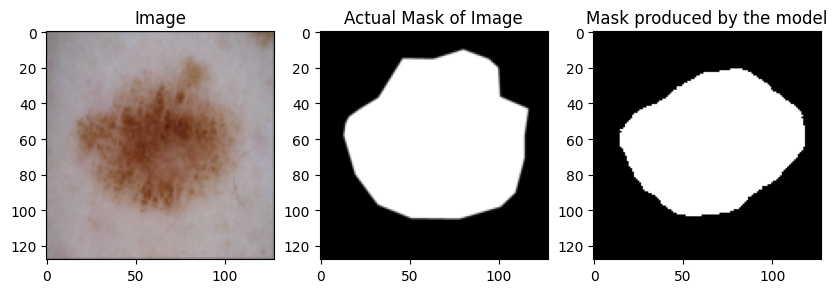

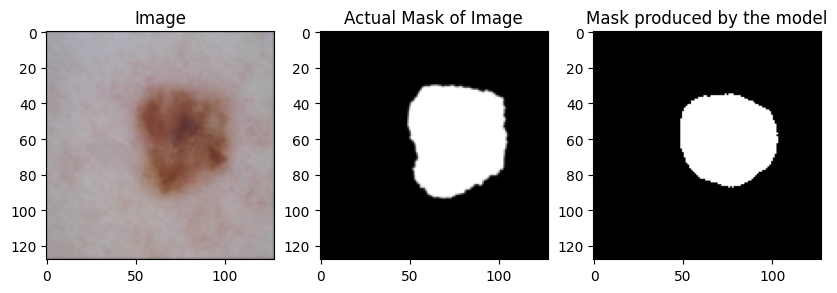

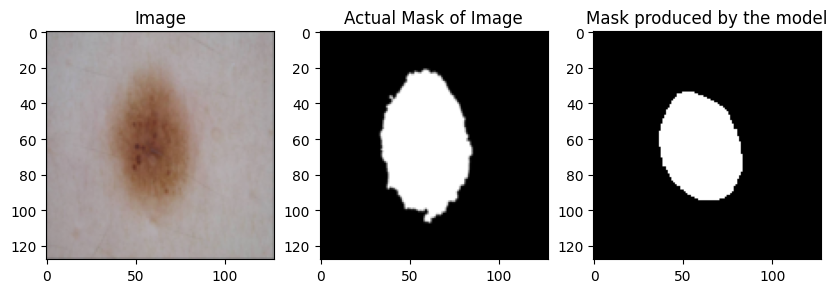

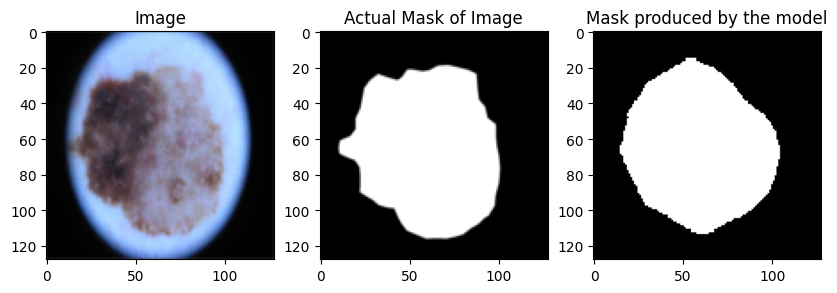

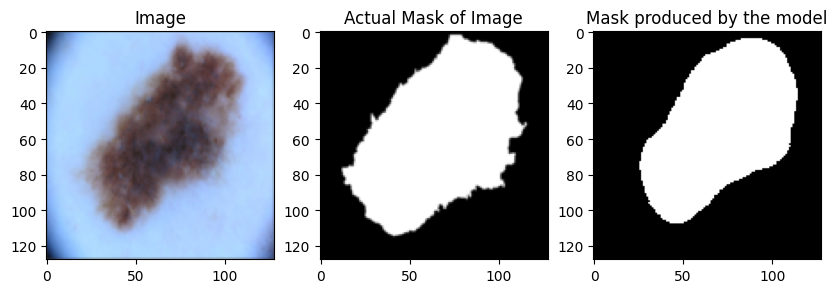

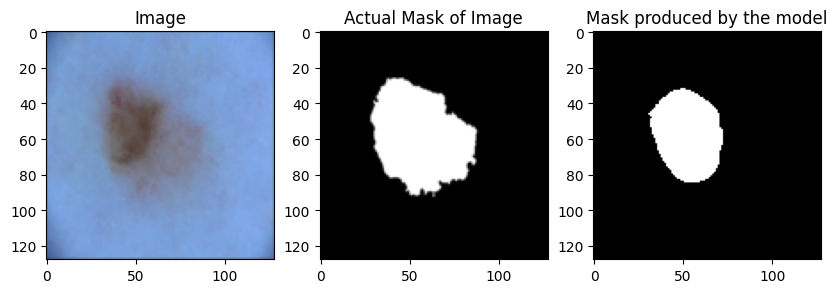

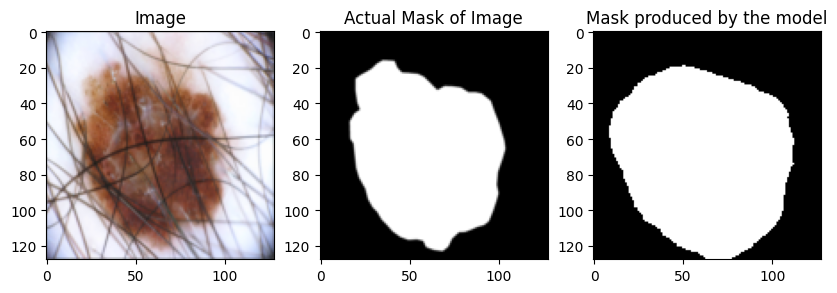

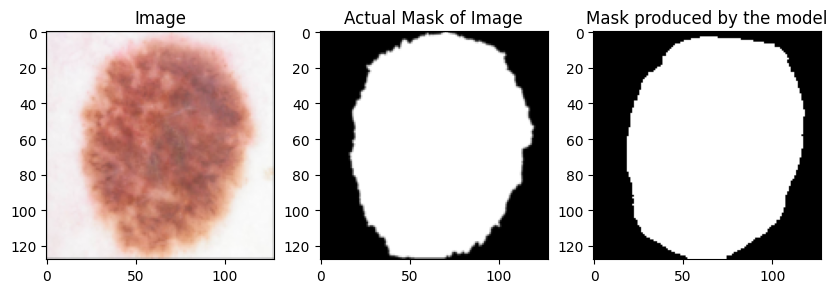

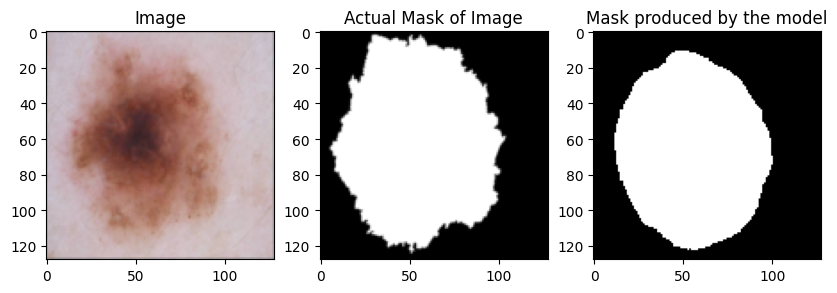

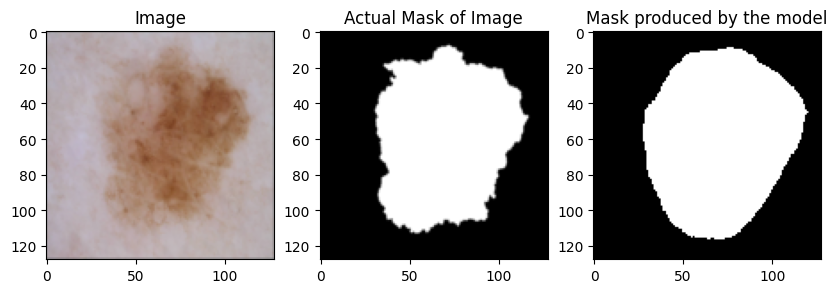

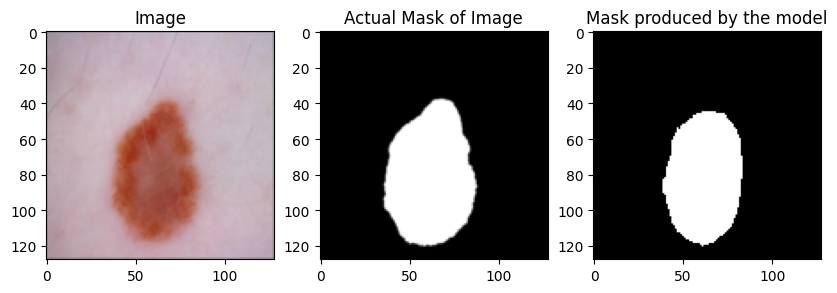

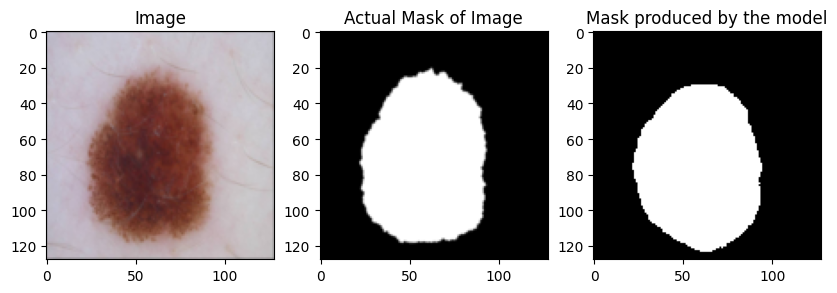

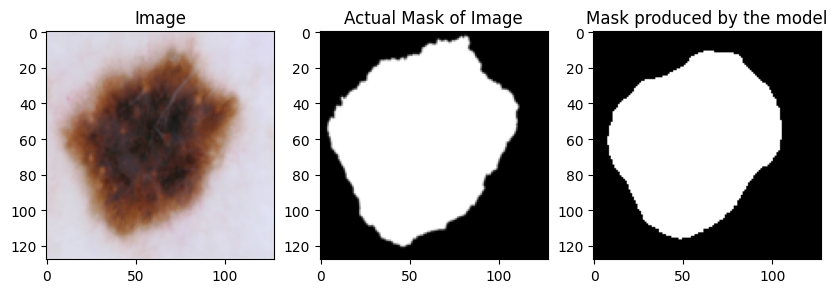

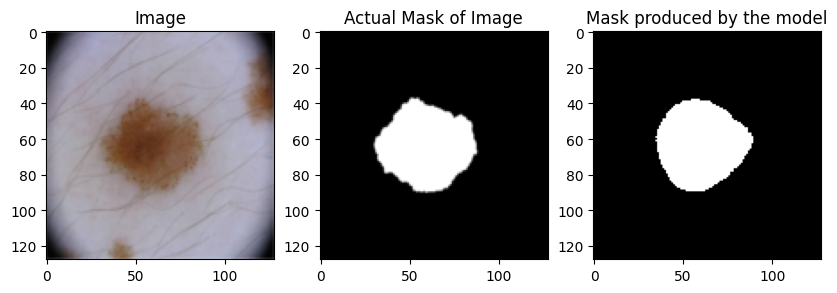

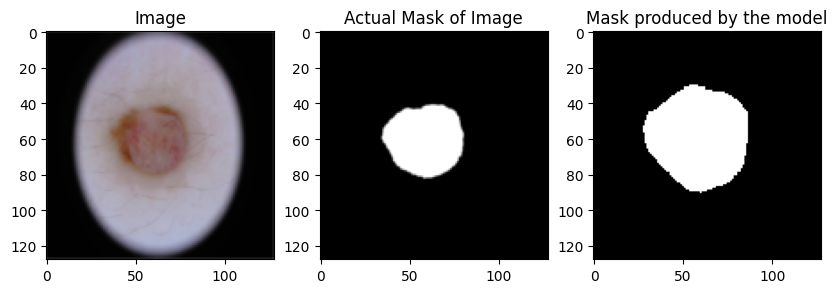

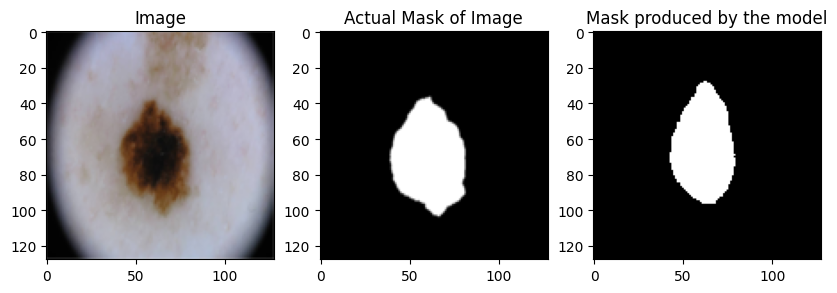

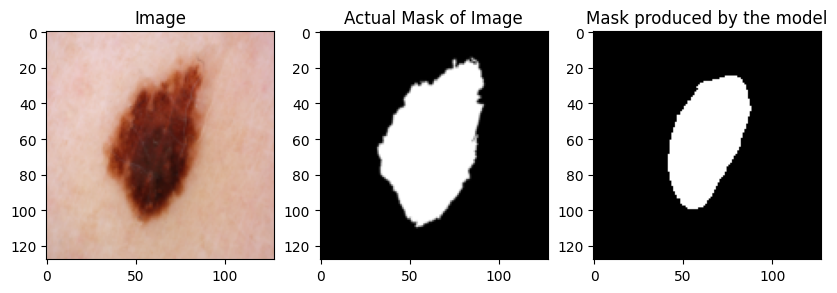

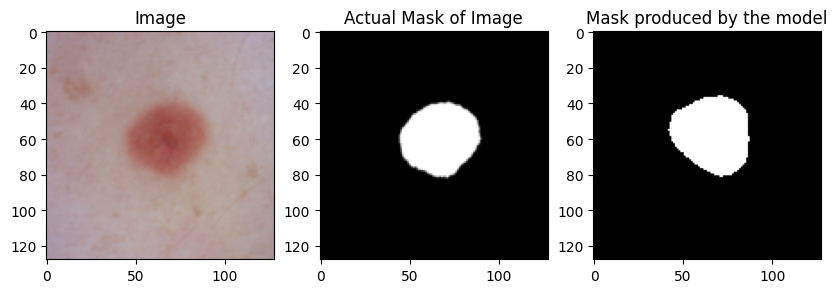

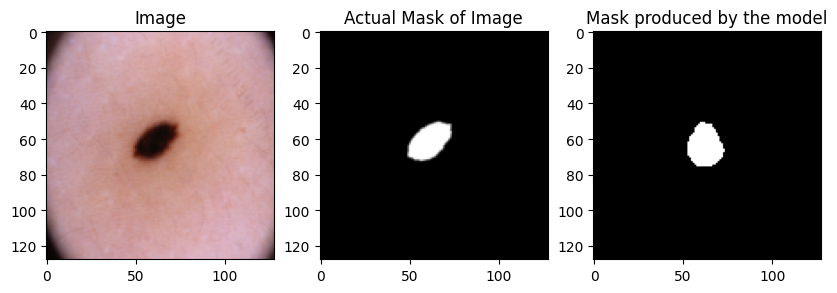

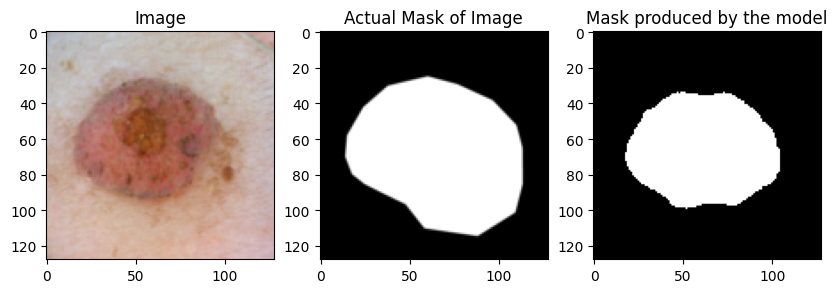

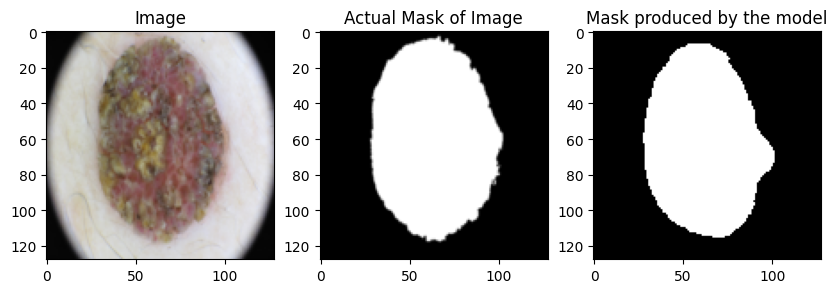

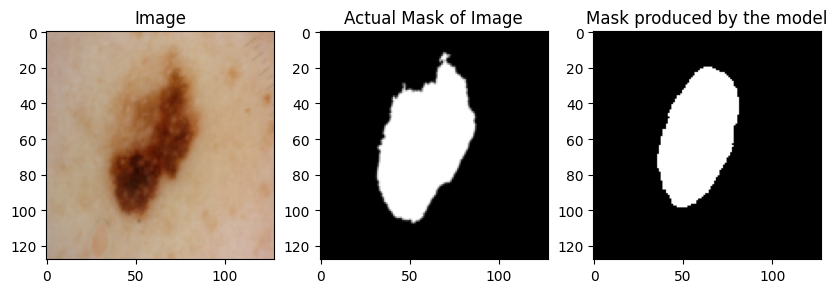

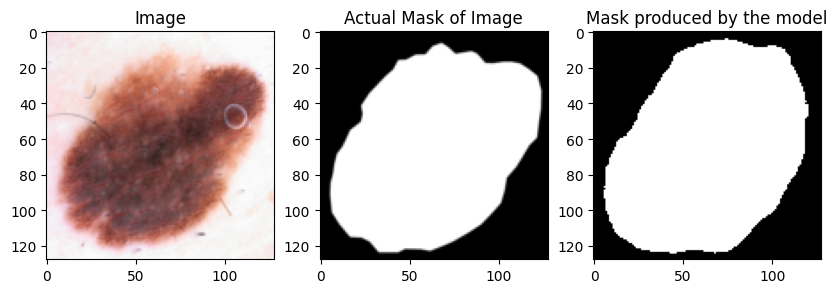

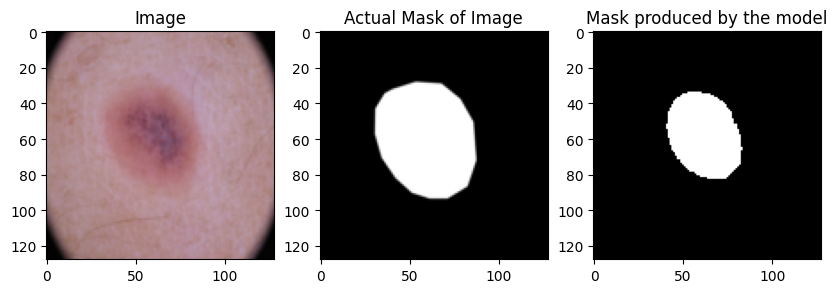

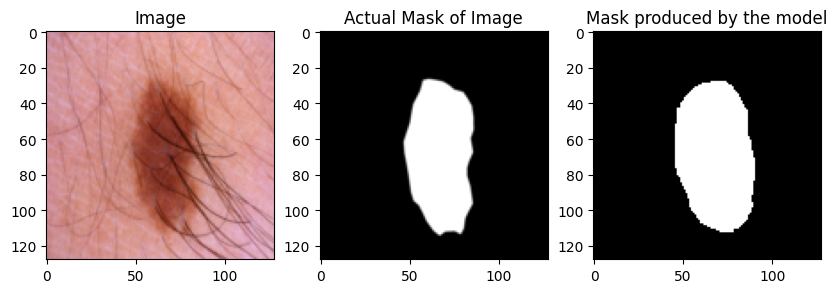

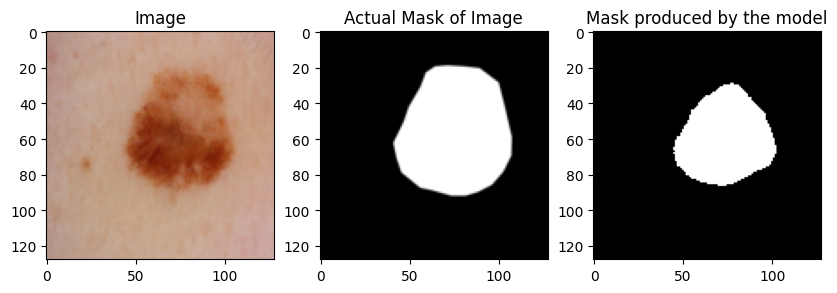

In [42]:
get_masks(test_loader, seg_encoder2, seg_decoder2, device, sample=1)

In [43]:
total3, trainable3, non_trainable3 = parameters(seg_encoder2)
print(f"Total parameters: {total3}")
print(f"Trainable parameters: {trainable3}")
print(f"Non-trainable parameters: {non_trainable3}")

Total parameters: 2223872
Trainable parameters: 2223872
Non-trainable parameters: 0


In [44]:
total4, trainable4, non_trainable4 =parameters(seg_encoder2)
print(f"Total parameters: {total4}")
print(f"Trainable parameters: {trainable4}")
print(f"Non-trainable parameters: {non_trainable4}")


Total parameters: 2223872
Trainable parameters: 2223872
Non-trainable parameters: 0


In [60]:
def write_model_parameters(model, filename):
    with open(filename, 'w') as f:
        f.write(f'MODEL {model}:\n')
        f.write("Model Parameters with their values:\n")
        for name, param in model.named_parameters():
            f.write(f"  {name}: {param}\n")
        f.write("\n")
write_model_parameters(seg_decoder, '/content/drive/MyDrive/DL/Model_Parameters.txt')
write_model_parameters(seg_decoder2, '/content/drive/MyDrive/DL/Model_Parameters.txt')
